In [1]:
import os
path='C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114\CT_COVID//CT_COVID//'
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114//CT_NonCOVID//CT_NonCOVID//'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114\\CT_COVID//CT_COVID//covid-10.png' -> 'C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114\\CT_COVID//CT_COVID//covid-2.png'

In [2]:
base_dir = 'C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114//'
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):os.mkdir(test_dir)

In [4]:
original_dataset_dir_covid = 'C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114\CT_COVID//CT_COVID//'
original_dataset_dir_non_covid = 'C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114//CT_NonCOVID//CT_NonCOVID//'

import shutil
fnames = ['covid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
fnames = ['noncovid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [7]:
def label_img(img):
    word_label = img.split('-')[0]
    if word_label == 'covid': return 1
    elif word_label == 'noncovid': return 0

In [8]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [9]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)

In [10]:
from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [11]:
model = VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=img_input,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
last_layer = model.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True),
    ModelCheckpoint(filepath='C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114//vgg19_model.h5', save_best_only=True),
]

In [17]:
history = model.fit(train_X, train_y,
                              batch_size=10,
                              epochs=10, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/10
50/50 [==============================] - 96s 2s/step - loss: 0.7741 - acc: 0.4748 - val_loss: 1.1218 - val_acc: 0.5000
Epoch 2/10
50/50 [==============================] - 98s 2s/step - loss: 0.7977 - acc: 0.5535 - val_loss: 0.5869 - val_acc: 0.8200
Epoch 3/10
50/50 [==============================] - 98s 2s/step - loss: 0.6376 - acc: 0.6358 - val_loss: 0.6186 - val_acc: 0.5800
Epoch 4/10
50/50 [==============================] - 98s 2s/step - loss: 0.5960 - acc: 0.6892 - val_loss: 0.6453 - val_acc: 0.5900
Epoch 5/10
50/50 [==============================] - 97s 2s/step - loss: 0.6330 - acc: 0.6344 - val_loss: 0.5268 - val_acc: 0.8200
Epoch 6/10
50/50 [==============================] - 98s 2s/step - loss: 0.5564 - acc: 0.7263 - val_loss: 0.5180 - val_acc: 0.7900
Epoch 7/10
50/50 [==============================] - 93s 2s/step - loss: 0.5176 - acc: 0.7860 - val_loss: 0.5607 - val_acc: 0.7000
Epoch 8/10
50/50 [==============================] - 90s 2s/step - loss: 0.5299 - acc: 0.71

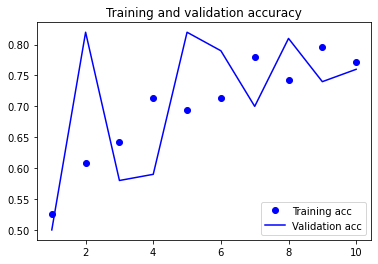

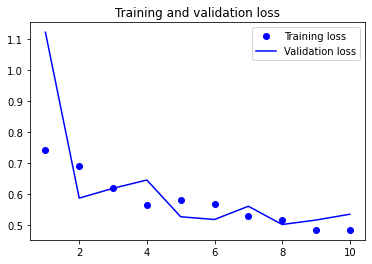

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from sklearn.metrics import accuracy_score
model.load_weights('C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114//vgg19_model.h5')
## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5


NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

# Fine Tuning 

In [17]:

from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model

last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
out = Dense(1, activation='sigmoid', name='output')(x)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-3]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114//tuned_vgg19_model.h5', save_best_only=True),
]

In [18]:
history = model.fit(train_X, train_y,
                              batch_size=20,
                              epochs=70, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)

Epoch 1/70
25/25 [==============================] - 95s 4s/step - loss: 1.3185 - acc: 0.5914 - val_loss: 0.7271 - val_acc: 0.5900
Epoch 2/70
25/25 [==============================] - 93s 4s/step - loss: 0.3304 - acc: 0.8236 - val_loss: 0.3976 - val_acc: 0.8300
Epoch 3/70
25/25 [==============================] - 93s 4s/step - loss: 0.2045 - acc: 0.9163 - val_loss: 0.3750 - val_acc: 0.8600
Epoch 4/70
25/25 [==============================] - 92s 4s/step - loss: 0.1636 - acc: 0.9334 - val_loss: 0.4811 - val_acc: 0.7900
Epoch 5/70
25/25 [==============================] - 94s 4s/step - loss: 0.0747 - acc: 0.9885 - val_loss: 0.3885 - val_acc: 0.8200
Epoch 6/70
25/25 [==============================] - 93s 4s/step - loss: 0.0552 - acc: 0.9945 - val_loss: 0.4380 - val_acc: 0.8300
Epoch 7/70
25/25 [==============================] - 93s 4s/step - loss: 0.0370 - acc: 1.0000 - val_loss: 0.3558 - val_acc: 0.8800
Epoch 8/70
25/25 [==============================] - 94s 4s/step - loss: 0.0230 - acc: 1.00

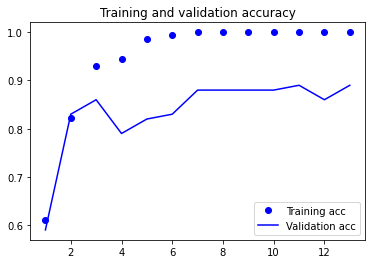

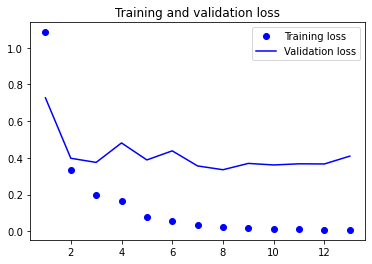

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
from sklearn.metrics import accuracy_score
model.load_weights('C://Users//Deep.ai//Downloads//1626498001264_TAA_JULY_114//TAA_JULY_114//tuned_vgg19_model.h5')
## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5


NameError: name 'model' is not defined

In [ ]:
test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)